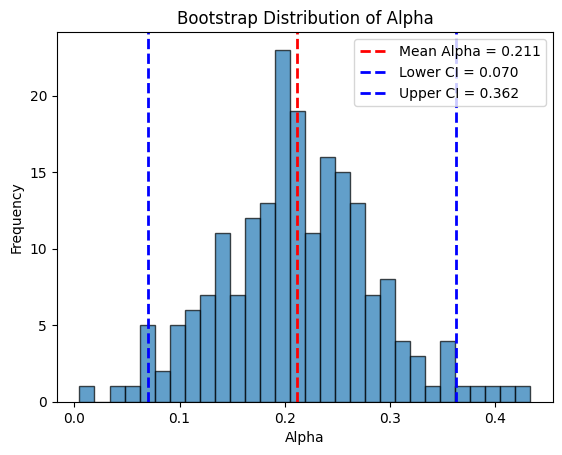

Mean Estimated Alpha: 0.2112
Standard Error of Alpha: 0.0728


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)
mean = [0, 0]
cov = [[2, 0.5], [0.5, 2.5]]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['X1', 'X2'])

def calculate_alpha(data):
    mean_x1 = sum(data[:, 0]) / len(data[:, 0])
    var_x1 = sum((data[:, 0] - mean_x1)**2) / (len(data[:, 0]) - 1)
    mean_x2 = sum(data[:, 1]) / len(data[:, 1])
    var_x2 = sum((data[:, 1] - mean_x2)**2) / (len(data[:, 1]) - 1)

    cov_x1_x2 = np.sum((data[:, 0] - mean_x1) * (data[:, 1] - mean_x2)) / (len(data[:, 0]) - 1)
    alpha = cov_x1_x2 / (var_x1 * var_x2) ** 0.5
    return alpha

original_alpha = calculate_alpha(data)

def bootstrap(data, num_iterations=200):
    alphas = []
    n = len(data)
    for _ in range(num_iterations):
        sample_indices = [int(np.random.uniform(0, n)) for _ in range(n)]
        sample = np.array([data[i] for i in sample_indices])
        alpha = calculate_alpha(sample)
        alphas.append(alpha)
    return alphas

num_iterations = 200
bootstrapped_alphas = bootstrap(data, num_iterations)
mean_alpha = sum(bootstrapped_alphas) / len(bootstrapped_alphas)
std_error_alpha = (sum((bootstrapped_alphas - mean_alpha)**2) / (len(bootstrapped_alphas) - 1))**0.5

confidence_level = 0.95
lower_bound = sorted(bootstrapped_alphas)[int((1 - confidence_level) / 2 * len(bootstrapped_alphas))]
upper_bound = sorted(bootstrapped_alphas)[int((1 + confidence_level) / 2 * len(bootstrapped_alphas))]

plt.hist(bootstrapped_alphas, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_alpha, color='red', linestyle='dashed', linewidth=2, label=f'Mean Alpha = {mean_alpha:.3f}')
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Lower CI = {lower_bound:.3f}')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Upper CI = {upper_bound:.3f}')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Alpha')
plt.legend()
plt.show()
print(f"Mean Estimated Alpha: {mean_alpha:.4f}")
print(f"Standard Error of Alpha: {std_error_alpha:.4f}")


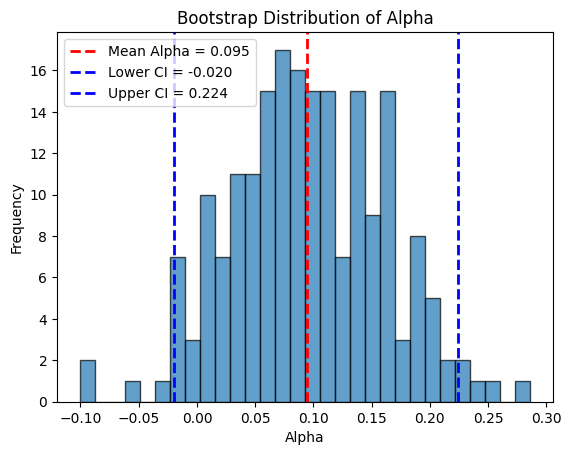

Mean Estimated Alpha: 0.0949
Standard Error of Alpha: 0.0657


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
x1 = [0 + 1.5 * np.random.randn() for _ in range(200)]
x2 = [0 + 2.0 * np.random.randn() for _ in range(200)]
data = list(zip(x1, x2))
df = pd.DataFrame(data, columns=['X1', 'X2'])

def calculate_alpha(data):
    mean_x1 = sum([point[0] for point in data]) / len(data)
    var_x1 = sum([(point[0] - mean_x1) ** 2 for point in data]) / (len(data) - 1)
    mean_x2 = sum([point[1] for point in data]) / len(data)
    var_x2 = sum([(point[1] - mean_x2) ** 2 for point in data]) / (len(data) - 1)
    cov_x1_x2 = sum([(point[0] - mean_x1) * (point[1] - mean_x2) for point in data]) / (len(data) - 1)
    alpha = cov_x1_x2 / (var_x1 * var_x2) ** 0.5
    return alpha

original_alpha = calculate_alpha(data)

def bootstrap(data, num_iterations=200):
    alphas = []
    n = len(data)
    for _ in range(num_iterations):
        sample_indices = [int(np.random.uniform(0, n)) for _ in range(n)]
        sample = [data[i] for i in sample_indices]
        alpha = calculate_alpha(sample)
        alphas.append(alpha)
    return alphas

num_iterations = 200
bootstrapped_alphas = bootstrap(data, num_iterations)

mean_alpha = sum(bootstrapped_alphas) / len(bootstrapped_alphas)
std_error = (sum([(alpha - mean_alpha) ** 2 for alpha in bootstrapped_alphas]) / (len(bootstrapped_alphas) - 1)) ** 0.5

confidence_level = 0.95
sorted_alphas = sorted(bootstrapped_alphas)
lower_bound = sorted_alphas[int((1 - confidence_level) / 2 * len(sorted_alphas))]
upper_bound = sorted_alphas[int((1 + confidence_level) / 2 * len(sorted_alphas))]

plt.hist(bootstrapped_alphas, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_alpha, color='red', linestyle='dashed', linewidth=2, label=f'Mean Alpha = {mean_alpha:.3f}')
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Lower CI = {lower_bound:.3f}')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Upper CI = {upper_bound:.3f}')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Alpha')
plt.legend()
plt.show()
print(f"Mean Estimated Alpha: {mean_alpha:.4f}")
print(f"Standard Error of Alpha: {std_error:.4f}")
